In [29]:
import pandas as pd
import os
import pyLDAvis
import pyLDAvis.gensim
import jieba.posseg as pseg
import nltk
from gensim import corpora, models, similarities

In [30]:
base_dir = './数据集'
train_dir = os.path.join(base_dir, '新闻分类.train.txt')
test_dir = os.path.join(base_dir, '新闻分类.test.txt')
val_dir = os.path.join(base_dir, '新闻分类.val.txt')
vocab_dir = os.path.join(base_dir, '新闻分类.vocab.txt')
df = pd.read_csv(train_dir, sep='\t', header=None, names=['Category', 'Text'])
df

,Category,Text
0,体育,马晓旭意外受伤让国奥警惕 无奈大雨格外青睐殷家军记者傅亚雨沈阳报道 来到沈阳，国奥队依然没有...
1,体育,商瑞华首战复仇心切 中国玫瑰要用美国方式攻克瑞典多曼来了，瑞典来了，商瑞华首战求3分的信心也...
2,体育,冠军球队迎新欢乐派对 黄旭获大奖张军赢下PK赛新浪体育讯12月27日晚，“冠军高尔夫球队迎新...
3,体育,辽足签约危机引注册难关 高层威逼利诱合同笑里藏刀新浪体育讯2月24日，辽足爆发了集体拒签风波...
4,体育,揭秘谢亚龙被带走：总局电话骗局 复制南杨轨迹体坛周报特约记者张锐北京报道 谢亚龙已经被公安...
...,...,...
49995,财经,打好投资的决胜局□国泰基金 阿邰就长期而言，资产配置占投资成功与否的决定因素高达90%以上。...
49996,财经,昔明星基金今年首月负收益 QDII成今年胸闷基金□晨报记者 陈重博2009年以来，所有偏股型...
49997,财经,沪基指全周大涨8.25% 创两个月最大周涨幅全景网2月6日讯 受到A股市场牛年高歌猛进影响，...
49998,财经,沪基指半日涨2.01% 两市封基近乎全线上扬全景网2月6日讯 沪深基金指数周五早盘大幅收高，...


In [31]:
data_needed = df['Text']
data_needed

0        马晓旭意外受伤让国奥警惕 无奈大雨格外青睐殷家军记者傅亚雨沈阳报道 来到沈阳，国奥队依然没有...
1        商瑞华首战复仇心切 中国玫瑰要用美国方式攻克瑞典多曼来了，瑞典来了，商瑞华首战求3分的信心也...
2        冠军球队迎新欢乐派对 黄旭获大奖张军赢下PK赛新浪体育讯12月27日晚，“冠军高尔夫球队迎新...
3        辽足签约危机引注册难关 高层威逼利诱合同笑里藏刀新浪体育讯2月24日，辽足爆发了集体拒签风波...
4        揭秘谢亚龙被带走：总局电话骗局 复制南杨轨迹体坛周报特约记者张锐北京报道  谢亚龙已经被公安...
                               ...                        
49995    打好投资的决胜局□国泰基金 阿邰就长期而言，资产配置占投资成功与否的决定因素高达90%以上。...
49996    昔明星基金今年首月负收益 QDII成今年胸闷基金□晨报记者 陈重博2009年以来，所有偏股型...
49997    沪基指全周大涨8.25% 创两个月最大周涨幅全景网2月6日讯 受到A股市场牛年高歌猛进影响，...
49998    沪基指半日涨2.01% 两市封基近乎全线上扬全景网2月6日讯 沪深基金指数周五早盘大幅收高，...
49999    牛年第一月 开基抬头券商集合理财掉队每经记者 于春敏在金融危机的淫威之下，2008年，全球资...
Name: Text, Length: 50000, dtype: object

In [32]:
#分词
data_cut=[]
stop_words = set(nltk.corpus.stopwords.words('chinese'))

for item in data_needed:
    # print(item)
    tmp = pseg.cut(item)
    tmp2=[[word.word,word.flag] for word in tmp]
    data_cut.append(tmp2)

data_chosen1 = [[word[0] for word in text if word[1]=='n' 
         or word[1]=='v' or word[1]=='a' or word[1]=='d' or word[1]=='nr' 
         or word[1]=='nrfg' or word[1]=='ns' or word[1]=='nt' or word[1]=='nz' 
         or word[1]=='vn' or word[1]=='vd' or word[1]=='an' or word[1]=='ad' 
         or word[1]=='l'] for text in data_cut]

data_chosen2 = []
for text in data_chosen1:
    new_text = []
    for word in text:
        if word not in stop_words:
            new_text.append(word)
    data_chosen2.append(new_text)

data_chosen = [[word for word in text if len(word)>1]for text in data_chosen2]

In [5]:
#聚类
texts = data_chosen

dictionary = corpora.Dictionary(texts) #构造词典
dictionary.filter_extremes(no_below=1, no_above=0.8)#去高频词

corpus = [dictionary.doc2bow(text) for text in texts] #构造语料库

lda_model = models.LdaModel(corpus, num_topics=7, id2word=dictionary, update_every=5, alpha=0.1, eta=0.1)

data=pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
pyLDAvis.save_html(data,"LDA.html")
lda_model.save("lda_model.model")

In [ ]:
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel

# 计算困惑度
perplexity_values = []
topic_range = range(2, 20)  # 选择合适的主题数量范围

for num_topics in topic_range:
    lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, update_every=5, alpha=0.1, eta=0.1)
    perplexity_values.append(lda_model.log_perplexity(corpus))

# 使用折肘法找到最佳主题数量
best_topic_num = topic_range[perplexity_values.index(min(perplexity_values))]

# 可视化困惑度
plt.plot(topic_range, perplexity_values, marker='o')
plt.xlabel('Number of Topics')
plt.ylabel('Perplexity')
plt.title('Perplexity across Different Number of Topics')
plt.show()

# 可视化折肘法
plt.plot(topic_range, perplexity_values, marker='o')
plt.xlabel('Number of Topics')
plt.ylabel('Perplexity')
plt.title('Perplexity across Different Number of Topics')
plt.axvline(x=best_topic_num, color='red', linestyle='--', label='Best Number of Topics')
plt.legend()
plt.show()



In [33]:
from gensim import models
from gensim.models import CoherenceModel
from sklearn.model_selection import train_test_split

# 假设docs是你的文档集合，每个文档表示为一个词汇列表
docs = texts

# 划分训练集和测试集
train_docs, test_docs = train_test_split(docs, test_size=0.2, random_state=42)

# 定义一个函数用于计算模型的一致性分数
def compute_coherence_score(dictionary, corpus, texts, num_topics):
    lda_model = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model_lda.get_coherence()
    return coherence_score

# 设置主题数的范围
min_topics = 2
max_topics = 12
step_size = 1

# 通过交叉验证选择最优主题数
best_score = -1
best_num_topics = -1

for num_topics in range(min_topics, max_topics + 1, step_size):
    coherence_score = compute_coherence_score(dictionary, corpus, train_docs, num_topics)
    
    print(f"Num Topics: {num_topics}, Coherence Score: {coherence_score}")
    
    if coherence_score > best_score:
        best_score = coherence_score
        best_num_topics = num_topics

print(f"Best Number of Topics: {best_num_topics}, Best Coherence Score: {best_score}")

# 使用最优主题数训练最终的模型
final_lda_model = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=best_num_topics)

Num Topics: 2, Coherence Score: 0.5280822531214359
Num Topics: 3, Coherence Score: 0.5487832269586824
Num Topics: 4, Coherence Score: 0.519755720496092
Num Topics: 5, Coherence Score: 0.45851436423414843
Num Topics: 6, Coherence Score: 0.49553609327148473
Num Topics: 7, Coherence Score: 0.536359239789303
Num Topics: 8, Coherence Score: 0.4590255163836241
Num Topics: 9, Coherence Score: 0.3881379176795298
Num Topics: 10, Coherence Score: 0.4874964485985214
Num Topics: 11, Coherence Score: 0.45222208625021776
Num Topics: 12, Coherence Score: 0.4135027042193748
Best Number of Topics: 3, Best Coherence Score: 0.5487832269586824


In [34]:
from gensim import models
from gensim.models import CoherenceModel
from sklearn.model_selection import train_test_split, KFold

# 假设docs是你的文档集合，每个文档表示为一个词汇列表
docs = texts

# 划分训练集和测试集
train_docs, test_docs = train_test_split(docs, test_size=0.2, random_state=42)

# 定义一个函数用于计算模型的一致性分数
def compute_coherence_score(dictionary, corpus, texts, num_topics):
    lda_model = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model_lda.get_coherence()
    return coherence_score

# 设置主题数的范围
min_topics = 2
max_topics = 12
step_size = 1

# 设置k折交叉验证
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# 初始化总的一致性分数
total_coherence_score = 0.0

# 进行k折交叉验证
for train_index, val_index in kf.split(train_docs):
    train_fold, val_fold = [train_docs[i] for i in train_index], [train_docs[i] for i in val_index]
    
    # 初始化折的一致性分数
    fold_coherence_score = 0.0
    
    for num_topics in range(min_topics, max_topics + 1, step_size):
        coherence_score = compute_coherence_score(dictionary, corpus, train_fold, num_topics)
        fold_coherence_score += coherence_score
        
        print(f"Fold: {num_topics}, Num Topics: {num_topics}, Coherence Score: {coherence_score}")
    
    fold_coherence_score /= (max_topics - min_topics + 1)  # 取平均值
    total_coherence_score += fold_coherence_score

    print(f"Fold {num_topics}, Average Coherence Score: {fold_coherence_score}")

# 计算平均一致性分数
avg_coherence_score = total_coherence_score / k_folds
print(f"Average Coherence Score across Folds: {avg_coherence_score}")

# 使用最优主题数训练最终的模型
final_lda_model = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=best_num_topics)


Fold: 2, Num Topics: 2, Coherence Score: 0.5078283861543934
Fold: 3, Num Topics: 3, Coherence Score: 0.5165231192703875
Fold: 4, Num Topics: 4, Coherence Score: 0.5086184291878834
Fold: 5, Num Topics: 5, Coherence Score: 0.4785954646277196
Fold: 6, Num Topics: 6, Coherence Score: 0.47340610298073477
Fold: 7, Num Topics: 7, Coherence Score: 0.4921157520355641
Fold: 8, Num Topics: 8, Coherence Score: 0.482150094689757
Fold: 9, Num Topics: 9, Coherence Score: 0.5312493425389723
Fold: 10, Num Topics: 10, Coherence Score: 0.44686585640810195
Fold: 11, Num Topics: 11, Coherence Score: 0.42697462024770194
Fold: 12, Num Topics: 12, Coherence Score: 0.47051159896068784
Fold 12, Average Coherence Score: 0.48498534246380937
Fold: 2, Num Topics: 2, Coherence Score: 0.532425661564793
Fold: 3, Num Topics: 3, Coherence Score: 0.536731908916419
Fold: 4, Num Topics: 4, Coherence Score: 0.5710954492493137
Fold: 5, Num Topics: 5, Coherence Score: 0.47615402172885435
Fold: 6, Num Topics: 6, Coherence Scor

In [ ]:
import matplotlib.pyplot as plt

data = """


"""
# Num Topics: 2, Coherence Score: 0.5157347324822289
# Num Topics: 3, Coherence Score: 0.5412758349232472
# Num Topics: 4, Coherence Score: 0.48020083249214757
# Num Topics: 5, Coherence Score: 0.4530480332611413
# Num Topics: 6, Coherence Score: 0.5398561410043926
# Num Topics: 7, Coherence Score: 0.4725464806657818
# Num Topics: 8, Coherence Score: 0.41160230673925857
# Num Topics: 9, Coherence Score: 0.49169100849912833
# Num Topics: 10, Coherence Score: 0.49464435229812975
# Num Topics: 11, Coherence Score: 0.4822385095649743
# Num Topics: 12, Coherence Score: 0.4594574464688244
# Num Topics: 13, Coherence Score: 0.5197404836007695
# Num Topics: 14, Coherence Score: 0.46405324532057973
# Num Topics: 15, Coherence Score: 0.3853298060200917
# Num Topics: 16, Coherence Score: 0.3917533759210941
# Num Topics: 17, Coherence Score: 0.431282988248633
# Num Topics: 18, Coherence Score: 0.44713651245104263
# Num Topics: 19, Coherence Score: 0.45942919748013206
# Num Topics: 20, Coherence Score: 0.4895734965704198

# 解析数据
lines = data.strip().split('\n')
num_topics = [int(line.split(',')[0].split(':')[1]) for line in lines]
coherence_scores = [float(line.split(',')[1].split(':')[1]) for line in lines]

# 绘制折线图
plt.plot(num_topics, coherence_scores, marker='o')
plt.title('Coherence Score vs Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.xticks(num_topics)
plt.grid(True)
plt.show()


In [38]:
import pandas as pd

data = """
Fold: 1, Num Topics: 2, Coherence Score: 0.5078283861543934
Fold: 1, Num Topics: 3, Coherence Score: 0.5165231192703875
Fold: 1, Num Topics: 4, Coherence Score: 0.5086184291878834
Fold: 1, Num Topics: 5, Coherence Score: 0.4785954646277196
Fold: 1, Num Topics: 6, Coherence Score: 0.47340610298073477
Fold: 1, Num Topics: 7, Coherence Score: 0.4921157520355641
Fold: 1, Num Topics: 8, Coherence Score: 0.482150094689757
Fold: 1, Num Topics: 9, Coherence Score: 0.5312493425389723
Fold: 1, Num Topics: 10, Coherence Score: 0.44686585640810195
Fold: 1, Num Topics: 11, Coherence Score: 0.42697462024770194
Fold: 1, Num Topics: 12, Coherence Score: 0.47051159896068784
Fold: 2, Num Topics: 2, Coherence Score: 0.532425661564793
Fold: 2, Num Topics: 3, Coherence Score: 0.536731908916419
Fold: 2, Num Topics: 4, Coherence Score: 0.5710954492493137
Fold: 2, Num Topics: 5, Coherence Score: 0.47615402172885435
Fold: 2, Num Topics: 6, Coherence Score: 0.4474765051282878
Fold: 2, Num Topics: 7, Coherence Score: 0.44974233371512334
Fold: 2, Num Topics: 8, Coherence Score: 0.48088591745906256
Fold: 2, Num Topics: 9, Coherence Score: 0.4546473859847731
Fold: 2, Num Topics: 10, Coherence Score: 0.45111581636704107
Fold: 2, Num Topics: 11, Coherence Score: 0.5141364787329449
Fold: 2, Num Topics: 12, Coherence Score: 0.4201880209658526
Fold: 3, Num Topics: 2, Coherence Score: 0.48694578887946643
Fold: 3, Num Topics: 3, Coherence Score: 0.5754586711958141
Fold: 3, Num Topics: 4, Coherence Score: 0.4859334469436496
Fold: 3, Num Topics: 5, Coherence Score: 0.555279238093742
Fold: 3, Num Topics: 6, Coherence Score: 0.49359936315500424
Fold: 3, Num Topics: 7, Coherence Score: 0.46794490388476323
Fold: 3, Num Topics: 8, Coherence Score: 0.4765784089635706
Fold: 3, Num Topics: 9, Coherence Score: 0.48369393212243417
Fold: 3, Num Topics: 10, Coherence Score: 0.4782770674116554
Fold: 3, Num Topics: 11, Coherence Score: 0.4855439993049574
Fold: 3, Num Topics: 12, Coherence Score: 0.4516657203076217
Fold: 4, Num Topics: 2, Coherence Score: 0.5053595113257191
Fold: 4, Num Topics: 3, Coherence Score: 0.5379258097981392
Fold: 4, Num Topics: 4, Coherence Score: 0.46858589335030676
Fold: 4, Num Topics: 5, Coherence Score: 0.5305490113518997
Fold: 4, Num Topics: 6, Coherence Score: 0.49801374858278796
Fold: 4, Num Topics: 7, Coherence Score: 0.4637869289960578
Fold: 4, Num Topics: 8, Coherence Score: 0.5296389641394861
Fold: 4, Num Topics: 9, Coherence Score: 0.4310999040278753
Fold: 4, Num Topics: 10, Coherence Score: 0.46000430624904737
Fold: 4, Num Topics: 11, Coherence Score: 0.469295327606191
Fold: 4, Num Topics: 12, Coherence Score: 0.4213194936131988
Fold: 5, Num Topics: 2, Coherence Score: 0.5111647291578781
Fold: 5, Num Topics: 3, Coherence Score: 0.539117419996527
Fold: 5, Num Topics: 4, Coherence Score: 0.5296965222601409
Fold: 5, Num Topics: 5, Coherence Score: 0.4954935519969729
Fold: 5, Num Topics: 6, Coherence Score: 0.4669993504494852
Fold: 5, Num Topics: 7, Coherence Score: 0.41345795516439876
Fold: 5, Num Topics: 8, Coherence Score: 0.4956620510727143
Fold: 5, Num Topics: 9, Coherence Score: 0.4609400235980147
Fold: 5, Num Topics: 10, Coherence Score: 0.4373753311936078
Fold: 5, Num Topics: 11, Coherence Score: 0.47973713306162846
Fold: 5, Num Topics: 12, Coherence Score: 0.44701397902060963
"""

# 读取数据并创建DataFrame
lines = data.strip().split('\n')

df = pd.DataFrame({
    'Fold': [int(line.split(',')[0].split(':')[-1]) for line in lines],
    'Num_Topics': [int(line.split(',')[1].split(':')[1]) for line in lines],
    'Coherence_Score': [float(line.split(',')[2].split(':')[1]) for line in lines]
})

print(df)



    Fold  Num_Topics  Coherence_Score
0      1           2         0.507828
1      1           3         0.516523
2      1           4         0.508618
3      1           5         0.478595
4      1           6         0.473406
5      1           7         0.492116
6      1           8         0.482150
7      1           9         0.531249
8      1          10         0.446866
9      1          11         0.426975
10     1          12         0.470512
11     2           2         0.532426
12     2           3         0.536732
13     2           4         0.571095
14     2           5         0.476154
15     2           6         0.447477
16     2           7         0.449742
17     2           8         0.480886
18     2           9         0.454647
19     2          10         0.451116
20     2          11         0.514136
21     2          12         0.420188
22     3           2         0.486946
23     3           3         0.575459
24     3           4         0.485933
25     3    

In [43]:
average_coherence_per_topic = df.groupby('Num_Topics')['Coherence_Score'].mean().reset_index()

print(average_coherence_per_topic)
print(average_coherence_per_topic['Coherence_Score'])

    Num_Topics  Coherence_Score
0            2         0.508745
1            3         0.541151
2            4         0.512786
3            5         0.507214
4            6         0.475899
5            7         0.457410
6            8         0.492983
7            9         0.472326
8           10         0.454728
9           11         0.475138
10          12         0.442140
0     0.508745
1     0.541151
2     0.512786
3     0.507214
4     0.475899
5     0.457410
6     0.492983
7     0.472326
8     0.454728
9     0.475138
10    0.442140
Name: Coherence_Score, dtype: float64


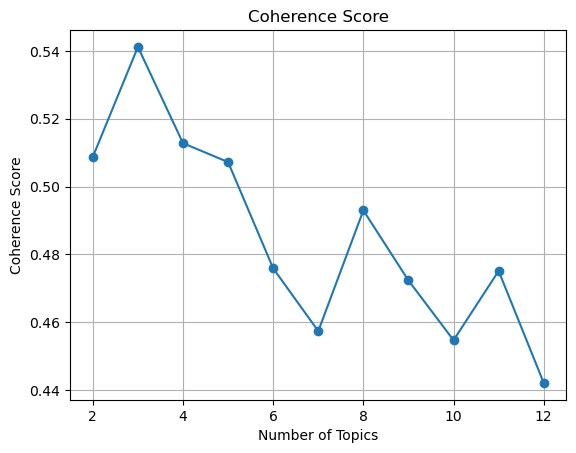

In [49]:
# 绘制折线图
plt.plot(average_coherence_per_topic['Num_Topics'], average_coherence_per_topic['Coherence_Score']
, marker='o')
plt.title('Coherence Score')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.grid(True)
plt.show()

In [ ]:
# 假设 data_needed 包含已处理好的文本数据
data_needed = df[df['Category'] == '财经'].copy()
user_history = ['']

# 创建文档-词频矩阵
texts = [text.split() for text in data_needed['Text']]
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# 使用LDA模型
num_topics = 5  # 选择主题的数量
lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# 对用户的历史阅读记录进行文本预处理
user_history = ' '.join(user_history)
user_bow = dictionary.doc2bow(user_history.split())
user_topic_distribution = lda_model[user_bow]

# 计算用户主题分布与每篇文章主题分布的相似度
data_needed['similarity_score'] = data_needed['Text'].apply(lambda x: cosine_similarity(lda_model[dictionary.doc2bow(x.split())], user_topic_distribution).ravel()[0])

# 根据相似度分数降序排列并推荐前几篇文章
recommended_articles = data_needed.sort_values(by='similarity_score', ascending=False)['Text'].head(5)[1:5]

# 打印推荐的新闻文章文本
print(recommended_articles)


48298    工银价值基金经理张翎：投资不可跟着情绪走 2008-10-24    随着国外金融危机的加剧...
48305    信心下挫：股票基金出现净赎回本报记者 张伟霖 截至10月24日，59家基金公司旗下的396只...
48304    仓位策略谨慎偏多 三季度基金调仓忙见习记者 刘雪峰  继2季度基金减仓4.32%之后，基金总...
48303    一个基金投资者的菜鸟赛季□张文凯 就投资基金而言，我肯定不能算新手；就投资QDII基金而言，...
Name: Text, dtype: object


In [ ]:
data_needed

45000               新增资金入场 沪胶强势创年内新高记者 魏曙光本报讯 上海天然橡胶期价周三再创年内新高，主力合...
45001               银行系基金新军崭露头角刚刚过去的2009年，基金市场为基民贡献了一份不错的成绩单。作为银行系...
45002               美国最近一周原油库存增加220万桶文华财经(综合编译 楼怡婷)--据纽约9月21日消息，美国...
45003               NYMEX原油期货电子盘持稳在75美元下方文华财经(编辑整理 王欣)--据新加坡9月23日消...
45004               亚洲燃料油裂解价差收窄 跨月合约仍遭大单抛售文华财经(编辑整理 何丽丽)--据新加坡9月23...
                                          ...                        
49996               昔明星基金今年首月负收益 QDII成今年胸闷基金□晨报记者 陈重博2009年以来，所有偏股型...
49997               沪基指全周大涨8.25% 创两个月最大周涨幅全景网2月6日讯 受到A股市场牛年高歌猛进影响，...
49998               沪基指半日涨2.01% 两市封基近乎全线上扬全景网2月6日讯 沪深基金指数周五早盘大幅收高，...
49999               牛年第一月 开基抬头券商集合理财掉队每经记者 于春敏在金融危机的淫威之下，2008年，全球资...
similarity_score    45000    1.0
45001    1.0
45002    1.0
45003  ...
Name: Text, Length: 5001, dtype: object

In [ ]:
# 输出主题分布
for idx, topic in lda_model.print_topics():
    print(f'Topic {idx}: {topic}')

Topic 0: 0.026*"基金" + 0.016*"银行" + 0.010*"公司" + 0.009*"市场" + 0.008*"投资" + 0.006*"产品" + 0.005*"投资者" + 0.005*"风险" + 0.005*"中国" + 0.004*"理财产品"
Topic 1: 0.013*"基金" + 0.011*"市场" + 0.009*"银行" + 0.008*"投资" + 0.006*"经济" + 0.005*"中国" + 0.004*"型基金" + 0.004*"利率" + 0.004*"发行" + 0.004*"贷款"
Topic 2: 0.037*"基金" + 0.011*"市场" + 0.009*"投资" + 0.008*"公司" + 0.007*"记者" + 0.006*"中国" + 0.006*"上涨" + 0.006*"人民币" + 0.006*"产品" + 0.005*"经济"
Topic 3: 0.044*"基金" + 0.012*"银行" + 0.011*"市场" + 0.007*"投资" + 0.006*"股票" + 0.005*"利率" + 0.005*"公司" + 0.005*"投资者" + 0.005*"债券" + 0.005*"中国"
Topic 4: 0.045*"基金" + 0.020*"银行" + 0.012*"市场" + 0.011*"公司" + 0.009*"投资" + 0.006*"人民币" + 0.006*"债券" + 0.006*"收益" + 0.006*"记者" + 0.005*"中国"


In [ ]:
# 实际推荐模块可能需要结合用户兴趣和历史记录，以下是一个简单的示例
def recommend_news(user_interests):
    user_interests_bow = dictionary.doc2bow(user_interests)
    user_topic_distribution = lda_model[user_interests_bow]

    # 根据主题分布排序新闻
    sorted_news = sorted(enumerate(user_topic_distribution), key=lambda x: x[1], reverse=True)

    # 输出推荐的新闻
    recommended_news = [data_needed.iloc[i] for i, _ in sorted_news]
    return recommended_news

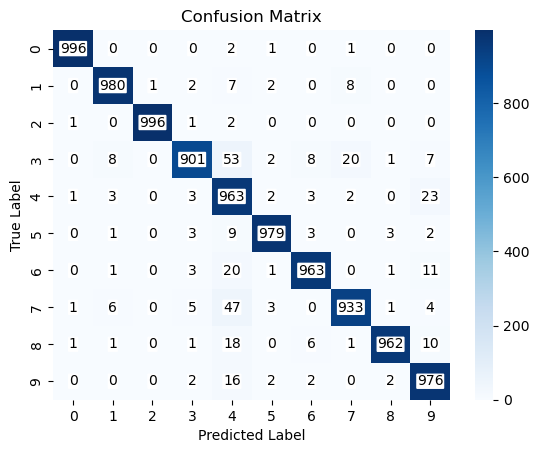

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 混淆矩阵数据
conf_matrix = [[996, 0, 0, 0, 2, 1, 0, 1, 0, 0],
               [0, 980, 1, 2, 7, 2, 0, 8, 0, 0],
               [1, 0, 996, 1, 2, 0, 0, 0, 0, 0],
               [0, 8, 0, 901, 53, 2, 8, 20, 1, 7],
               [1, 3, 0, 3, 963, 2, 3, 2, 0, 23],
               [0, 1, 0, 3, 9, 979, 3, 0, 3, 2],
               [0, 1, 0, 3, 20, 1, 963, 0, 1, 11],
               [1, 6, 0, 5, 47, 3, 0, 933, 1, 4],
               [1, 1, 0, 1, 18, 0, 6, 1, 962, 10],
               [0, 0, 0, 2, 16, 2, 2, 0, 2, 976]]

# 使用 Seaborn 创建热图
ax = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))

# 在每个单元格上标注数字，设置字体颜色为黑色，边框颜色为白色
for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix[i])):
        ax.text(j + 0.5, i + 0.5, str(conf_matrix[i][j]), ha='center', va='center', color='black'
                ,bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0')
                )

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

